In [3]:
from typing import *
import pandas as pd
import sys 
sys.path.append('..')

In [4]:
%load_ext autoreload
%autoreload 2
from relation import Analysis
from analysis import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/home/anto/Softwares/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [5]:
mcut=1e10

In [6]:
Snaps: List[str] = ['140','132','120','116','108', '100', '096' ]
AnaObjDict: dict = {}
for snap in Snaps:
    AnaObjDict[snap] = Analysis(50, snap,'',mcut_gal=mcut)

Galaxies mass cut applied: total-1360307, current-569385, removed-790922
Galaxies mass cut applied: total-1366731, current-565468, removed-801263
Galaxies mass cut applied: total-1374180, current-557045, removed-817135
Galaxies mass cut applied: total-1375324, current-552975, removed-822349
Galaxies mass cut applied: total-1376458, current-544841, removed-831617
Galaxies mass cut applied: total-1374486, current-534050, removed-840436
Galaxies mass cut applied: total-1373060, current-528910, removed-844150


In [7]:
Dfs: Dict = {}
for snap in Snaps:
    Dfs[snap] = AnaObjDict[snap].get_dataframe()

In [8]:
Zs: Dict = {}
for snap in Snaps:
    Zs[snap] = AnaObjDict[snap].scaling.z

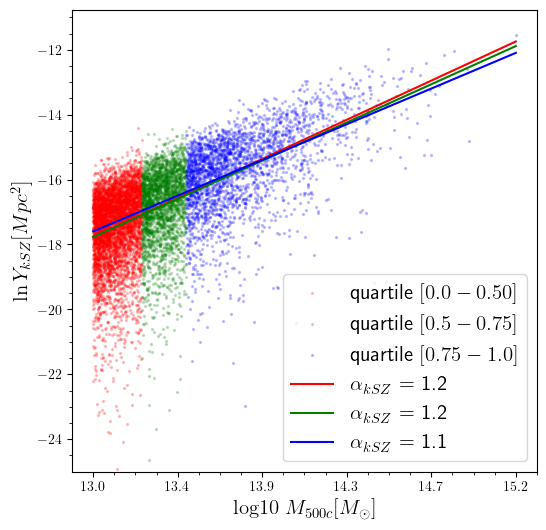

In [9]:
HaloMass_quartile_fit(Dfs[Snaps[1]])

In [13]:
_snaps: List = ['140', '116', '096']
_zs: List = [Zs[_snap] for _snap in _snaps]

Correlation at z=0.03 is 0.90
Correlation at z=0.25 is 0.89
Correlation at z=0.47 is 0.90


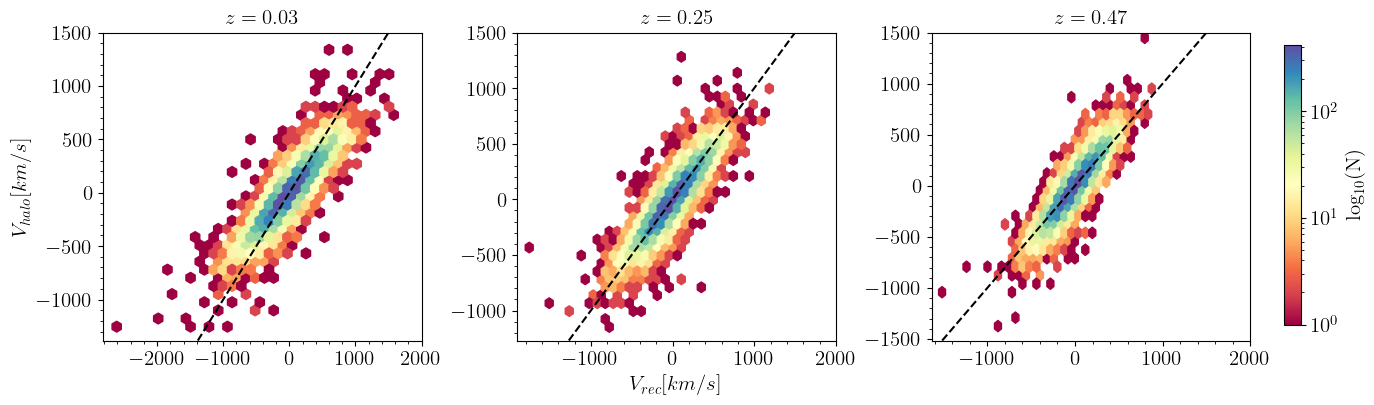

In [14]:
V_losVSrec(Dfs[_snaps[0]], Dfs[_snaps[1]], Dfs[_snaps[2]], _zs,v_comp='z')

In [15]:
Dfs_with_err: Dict = {}
z_err: List = [0.03,0.038,0.044]
for i,_snap in enumerate(_snaps):
    Dfs_with_err[_snap] = Analysis(50, snap,'',mcut_gal=mcut,zerr=z_err[i]).get_dataframe()

Galaxies mass cut applied: total-1373060, current-528910, removed-844150
Galaxies mass cut applied: total-1373060, current-528910, removed-844150
Galaxies mass cut applied: total-1373060, current-528910, removed-844150


Correlation at z=0.03 is 0.90
Correlation at z=0.25 is 0.90
Correlation at z=0.47 is 0.90


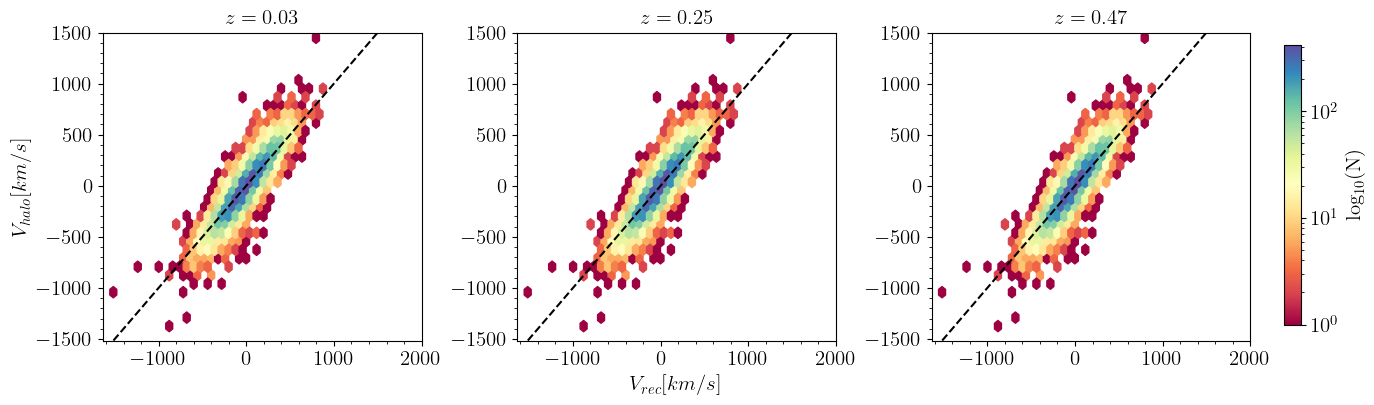

In [16]:
V_losVSrec(Dfs_with_err[_snaps[0]], Dfs_with_err[_snaps[1]], Dfs_with_err[_snaps[2]], _zs,v_comp='z')

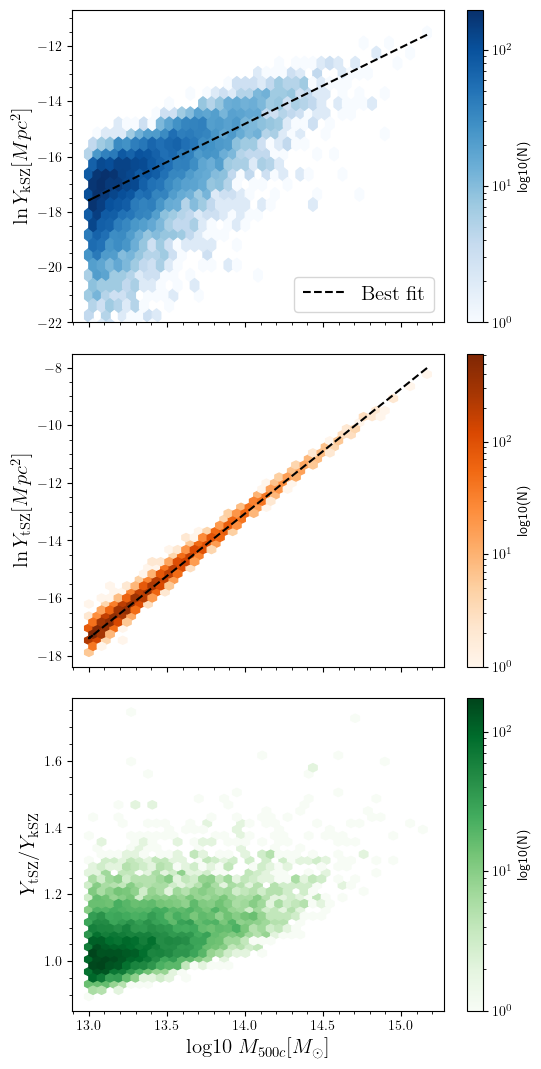

In [26]:
Yksz_Ytsz(Dfs[Snaps[0]])

In [32]:
_zs

[0.032637493, 0.25208907, 0.47019408]

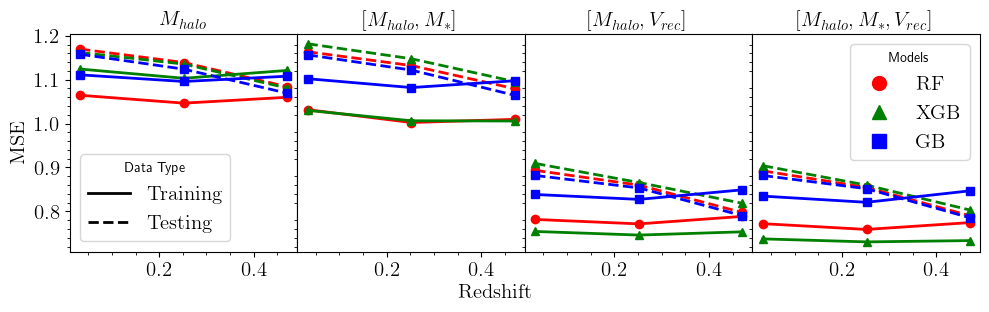

In [35]:
MSE_df_feature(Dfs[_snaps[0]], Dfs[_snaps[1]], Dfs[_snaps[2]], _zs, verbose=False)

In [53]:
cross_snaps = ['140','132','120','108','100']

This function assumes first snapshot as the training dataset


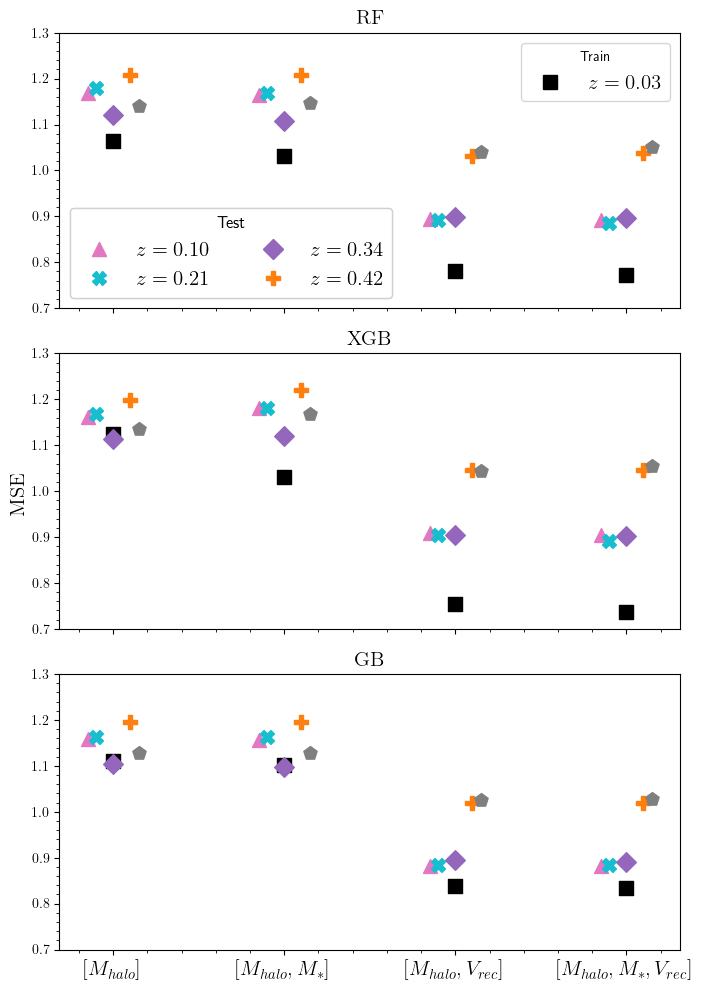

In [57]:
MSE_cross_df(Dfs,Zs,cross_snaps,verbose=False)